# Load Data

## Pip Install Kagglehub

In [1]:
pip install kagglehub[pandas-datasets]

## Libraries

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load Datasets

In [3]:
dataset = "halaturkialotaibi/saas-business-metrics-customers-plans-and-revenue"

# Load customers
customers = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    dataset,
    "customers.csv"
)

# Load revenue
revenue = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    dataset,
    "revenue.csv"
)

# Load subscriptions
subscriptions = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    dataset,
    "subscriptions.csv"
)

/tmp/ipython-input-1228596194.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  customers = kagglehub.load_dataset(


Using Colab cache for faster access to the 'saas-business-metrics-customers-plans-and-revenue' dataset.


/tmp/ipython-input-1228596194.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  revenue = kagglehub.load_dataset(


Using Colab cache for faster access to the 'saas-business-metrics-customers-plans-and-revenue' dataset.


/tmp/ipython-input-1228596194.py:18: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  subscriptions = kagglehub.load_dataset(


Using Colab cache for faster access to the 'saas-business-metrics-customers-plans-and-revenue' dataset.


# Data Learning

In [4]:
print("Customers: \n", customers.head())
print("\nRevenue: \n", revenue.head())
print("\nSubscription: \n",subscriptions.head())

Customers: 
    customer_id signup_date plan_type  monthly_fee  acquisition_cost churn_date
0         1001  2024-11-07     Basic           50                30        NaN
1         1002  2024-06-06     Basic           50                30        NaN
2         1003  2024-12-31     Basic           50                30        NaN
3         1004  2024-11-21       Pro          200               100        NaN
4         1005  2024-08-16       Pro          200               100        NaN

Revenue: 
   subscription_id  customer_id    month  monthly_fee revenue_type  amount
0   S-1020-202410         1020  2024-10          200          MRR     200
1   S-1020-202411         1020  2024-11          200          MRR     200
2   S-1020-202412         1020  2024-12          200          MRR     200
3   S-1020-202501         1020  2025-01          200          MRR     200
4   S-1020-202502         1020  2025-02          200          MRR     200

Subscription: 
   subscription_id  customer_id    month 

### Check Types

In [5]:
print("Info for customers DataFrame:")
customers.info()

print("\nInfo for revenue DataFrame:")
revenue.info()

print("\nInfo for subscriptions DataFrame:")
subscriptions.info()

Info for customers DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       1000 non-null   int64 
 1   signup_date       1000 non-null   object
 2   plan_type         1000 non-null   object
 3   monthly_fee       1000 non-null   int64 
 4   acquisition_cost  1000 non-null   int64 
 5   churn_date        168 non-null    object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB

Info for revenue DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subscription_id  988 non-null    object
 1   customer_id      988 non-null    int64 
 2   month            988 non-null    object
 3   monthly_fee      988 non-null    int64 
 4   revenue_type     988 non-null    objec

### Check for Missing Values

In [6]:
print("Missing values in customers DataFrame:\n", customers.isnull().sum())
print("\nMissing values in revenue DataFrame:\n", revenue.isnull().sum())
print("\nMissing values in subscriptions DataFrame:\n", subscriptions.isnull().sum())

Missing values in customers DataFrame:
 customer_id           0
signup_date           0
plan_type             0
monthly_fee           0
acquisition_cost      0
churn_date          832
dtype: int64

Missing values in revenue DataFrame:
 subscription_id    0
customer_id        0
month              0
monthly_fee        0
revenue_type       0
amount             0
dtype: int64

Missing values in subscriptions DataFrame:
 subscription_id    0
customer_id        0
month              0
monthly_fee        0
dtype: int64


### Count Records

In [7]:
print("Number of records in customers DataFrame:", len(customers))
print("Number of records in revenue DataFrame:", len(revenue))
print("Number of records in subscriptions DataFrame:", len(subscriptions))

Number of records in customers DataFrame: 1000
Number of records in revenue DataFrame: 988
Number of records in subscriptions DataFrame: 988


In [8]:
missing_churn_percentage = (customers['churn_date'].isnull().sum() / len(customers)) * 100
print(f"Percentage of missing 'churn_date' values: {missing_churn_percentage:.2f}%")

# Also check the number of unique values in churn_date to see if there are any other specific indicators of non-churn
print(f"Number of unique values in 'churn_date': {customers['churn_date'].nunique()}")

Percentage of missing 'churn_date' values: 83.20%
Number of unique values in 'churn_date': 122


## Merging Datasets

In [9]:
subscriptions_revenue = pd.merge(subscriptions, revenue, on=['subscription_id', 'customer_id', 'month', 'monthly_fee'], how='inner')
print("Merged subscriptions and revenue DataFrames successfully. Displaying the first 5 rows:")
print(subscriptions_revenue.head())

Merged subscriptions and revenue DataFrames successfully. Displaying the first 5 rows:
  subscription_id  customer_id    month  monthly_fee revenue_type  amount
0   S-1020-202410         1020  2024-10          200          MRR     200
1   S-1020-202411         1020  2024-11          200          MRR     200
2   S-1020-202412         1020  2024-12          200          MRR     200
3   S-1020-202501         1020  2025-01          200          MRR     200
4   S-1020-202502         1020  2025-02          200          MRR     200


In [10]:
merged_df = pd.merge(subscriptions_revenue, customers, on=['customer_id', 'monthly_fee'], how='inner')
print("Merged all DataFrames successfully:")
print(merged_df.head())

print("\nInfo for the final merged DataFrame:")
merged_df.info()

Merged all DataFrames successfully:
  subscription_id  customer_id    month  monthly_fee revenue_type  amount  \
0   S-1020-202410         1020  2024-10          200          MRR     200   
1   S-1020-202411         1020  2024-11          200          MRR     200   
2   S-1020-202412         1020  2024-12          200          MRR     200   
3   S-1020-202501         1020  2025-01          200          MRR     200   
4   S-1020-202502         1020  2025-02          200          MRR     200   

  signup_date plan_type  acquisition_cost  churn_date  
0  2024-10-13       Pro               100  2025-05-08  
1  2024-10-13       Pro               100  2025-05-08  
2  2024-10-13       Pro               100  2025-05-08  
3  2024-10-13       Pro               100  2025-05-08  
4  2024-10-13       Pro               100  2025-05-08  

Info for the final merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 10 columns):
 #   Column           

# EDA

## Monthly Recurring Revenue (MRR)

In [11]:
merged_df['month'] = pd.to_datetime(merged_df['month'], errors='coerce')

mrr_df = merged_df.groupby('month')['amount'].sum().reset_index()
mrr_df.rename(columns={'amount': 'MRR'}, inplace=True)

print("Monthly Recurring Revenue (MRR) calculation complete. Displaying all rows:")
print(mrr_df.head(18))

Monthly Recurring Revenue (MRR) calculation complete. Displaying all rows:
        month    MRR
0  2024-01-01   1850
1  2024-02-01   4600
2  2024-03-01   7650
3  2024-04-01   9600
4  2024-05-01  11750
5  2024-06-01  12700
6  2024-07-01  15900
7  2024-08-01  17800
8  2024-09-01  17150
9  2024-10-01  18750
10 2024-11-01  17900
11 2024-12-01  19300
12 2025-01-01  20800
13 2025-02-01  22500
14 2025-03-01  21150
15 2025-04-01  15600
16 2025-05-01  10900
17 2025-06-01   3900


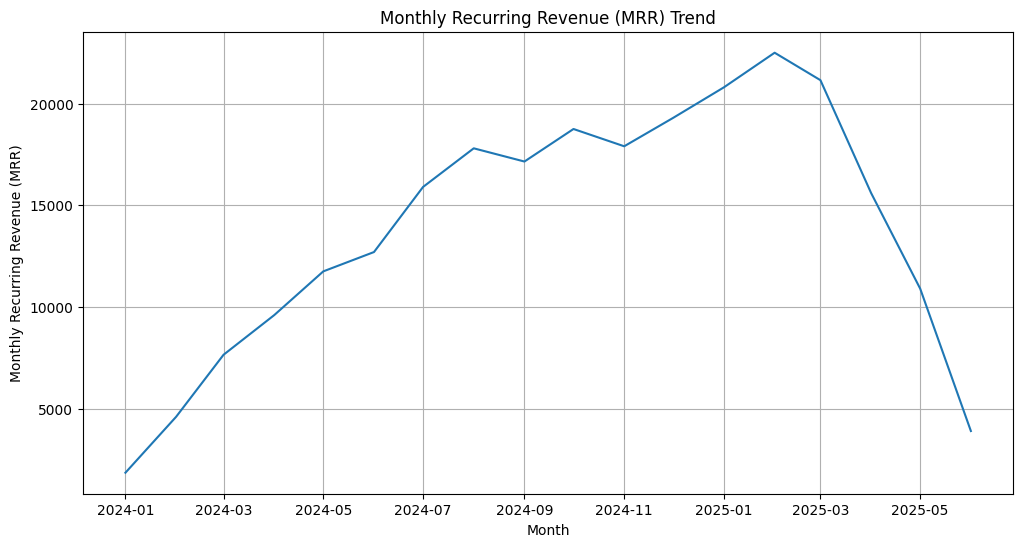

Monthly Recurring Revenue (MRR) trend plot displayed.


In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mrr_df, x='month', y='MRR')
plt.title('Monthly Recurring Revenue (MRR) Trend')
plt.xlabel('Month')
plt.ylabel('Monthly Recurring Revenue (MRR)')
plt.grid(True)
plt.show()

print("Monthly Recurring Revenue (MRR) trend plot displayed.")

In [13]:
plan_distribution = merged_df['plan_type'].value_counts().reset_index()
plan_distribution.columns = ['plan_type', 'customer_count']

print("Customer distribution by plan type calculated. Displaying all rows:")
print(plan_distribution.head())

Customer distribution by plan type calculated. Displaying all rows:
    plan_type  customer_count
0         Pro             334
1  Enterprise             334
2       Basic             320


## Customer distribution by plan type

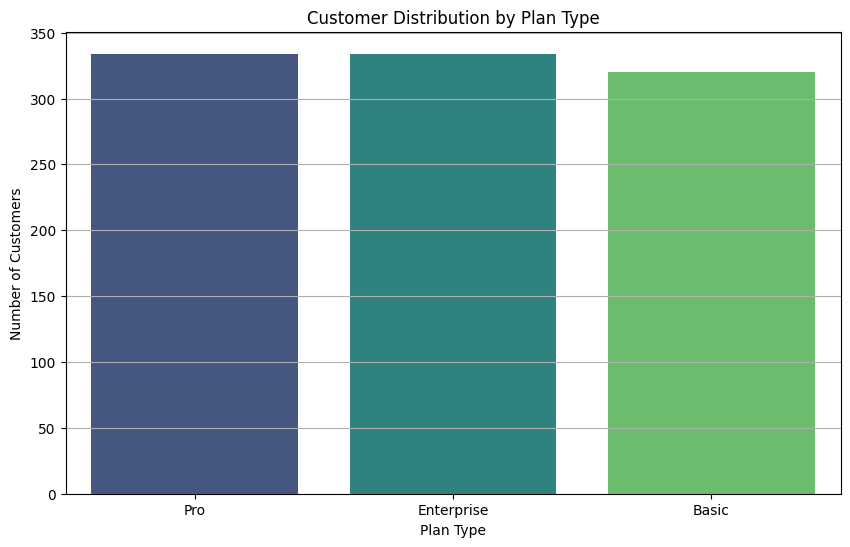

Customer distribution by plan type bar chart displayed.


In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=plan_distribution, x='plan_type', y='customer_count', hue='plan_type', palette='viridis', legend=False)
plt.title('Customer Distribution by Plan Type')
plt.xlabel('Plan Type')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

print("Customer distribution by plan type bar chart displayed.")

## Customer Churn Over Time

In [15]:
# Filter for customers who have a churn date.
churned_customers = customers.dropna(subset=['churn_date']).copy()

# Prepare Churn Month for Analysis
churned_customers["churn_month"] = pd.to_datetime(churned_customers["churn_date"]).dt.to_period("M").dt.to_timestamp()

# Count Churned Customers by Month
churn_counts = churned_customers.groupby("churn_month").size().reset_index(name='churned_customers')

print("Customer churn counts calculation complete. Displaying all rows:")
print(churn_counts.head(16))

Customer churn counts calculation complete. Displaying all rows:
   churn_month  churned_customers
0   2024-02-01                  1
1   2024-04-01                  1
2   2024-05-01                  2
3   2024-06-01                  5
4   2024-07-01                  4
5   2024-08-01                  4
6   2024-09-01                  6
7   2024-10-01                  6
8   2024-11-01                  8
9   2024-12-01                  6
10  2025-01-01                  6
11  2025-02-01                  6
12  2025-03-01                 26
13  2025-04-01                 23
14  2025-05-01                 23
15  2025-06-01                 41


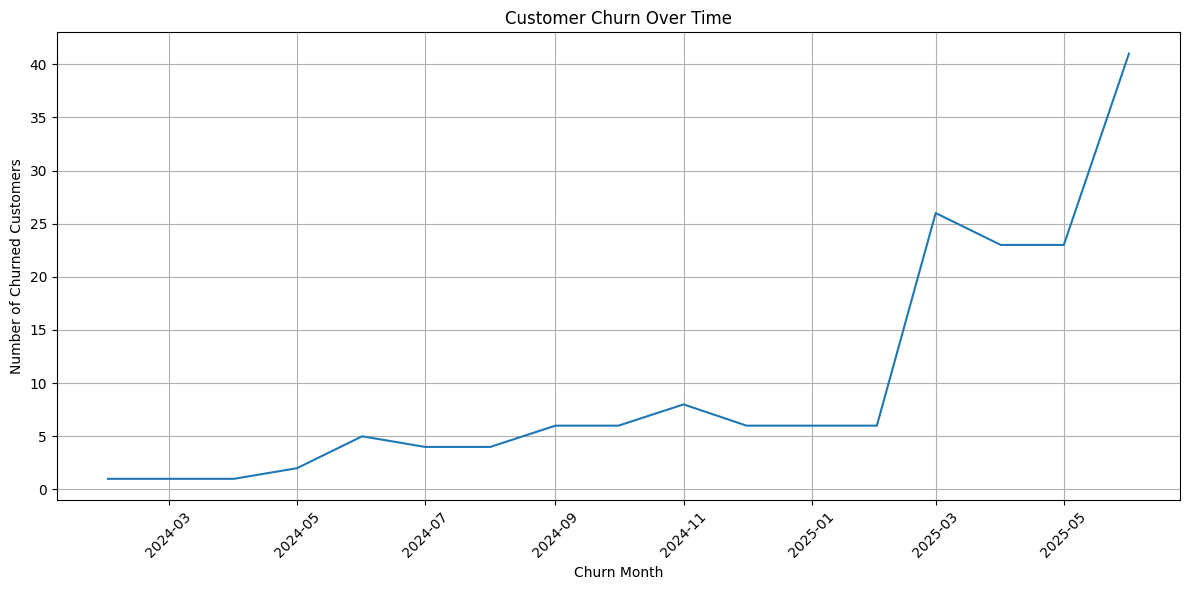

In [16]:
# Plotting the churn over time.
plt.figure(figsize=(12, 6))
sns.lineplot(data=churn_counts, x='churn_month', y='churned_customers')
plt.title('Customer Churn Over Time')
plt.xlabel('Churn Month')
plt.ylabel('Number of Churned Customers')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## New Customers per Month (Signup Trend)

In [17]:
# Calculate new customers per month using the 'customers' DataFrame
customers_per_month = customers.drop_duplicates("customer_id").groupby(
    pd.to_datetime(customers["signup_date"]).dt.to_period("M").dt.to_timestamp()
).size().reset_index(name='new_customers')

# The column created from the index of the groupby result is named 'signup_date'
# because the original Series 'customers["signup_date"]' carried its name.
# Rename it to 'signup_month' for consistency with the plot's x-axis label.
customers_per_month.rename(columns={'signup_date': 'signup_month'}, inplace=True)

print("New Customers per Month calculation complete. Displaying the first 5 rows:")
print(customers_per_month.head(18))

New Customers per Month calculation complete. Displaying the first 5 rows:
   signup_month  new_customers
0    2024-01-01             57
1    2024-02-01             53
2    2024-03-01             63
3    2024-04-01             50
4    2024-05-01             52
5    2024-06-01             51
6    2024-07-01             49
7    2024-08-01             52
8    2024-09-01             48
9    2024-10-01             59
10   2024-11-01             67
11   2024-12-01             58
12   2025-01-01             53
13   2025-02-01             56
14   2025-03-01             65
15   2025-04-01             57
16   2025-05-01             60
17   2025-06-01             50


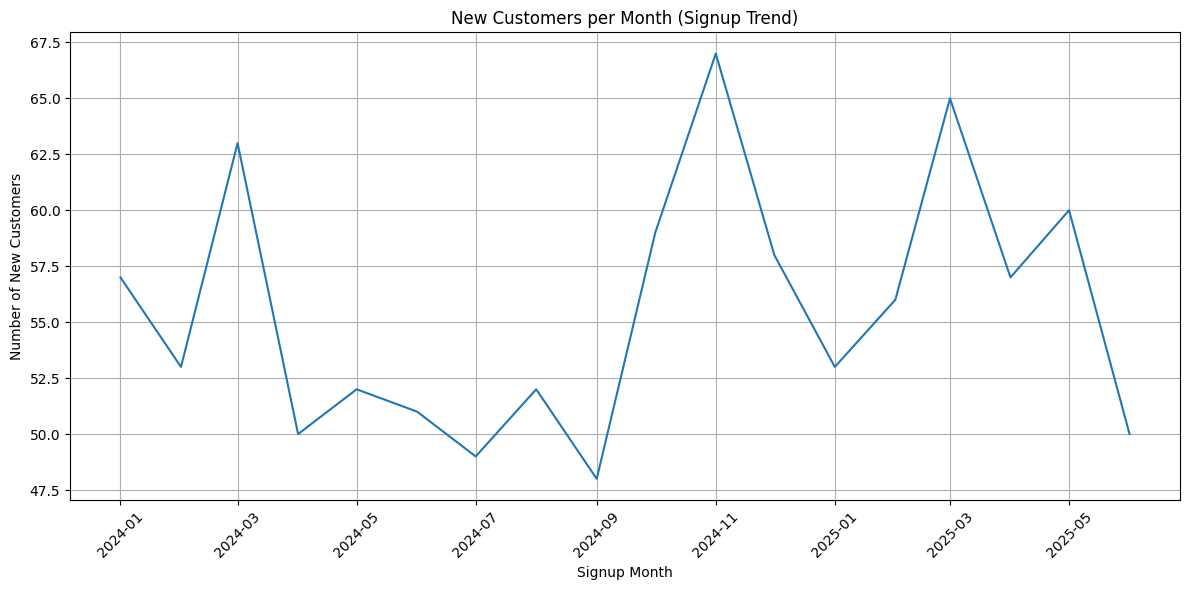

In [18]:
# Plotting the New Customers per Month trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=customers_per_month, x='signup_month', y='new_customers')
plt.title('New Customers per Month (Signup Trend)')
plt.xlabel('Signup Month')
plt.ylabel('Number of New Customers')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Average Revenue Per User (ARPU) Trend

In [19]:
# Calculate total revenue per month
monthly_revenue = merged_df.groupby('month')['amount'].sum().reset_index()
monthly_revenue.rename(columns={'amount': 'total_revenue'}, inplace=True)

# Calculate unique customers per month
monthly_active_customers = merged_df.groupby('month')['customer_id'].nunique().reset_index()
monthly_active_customers.rename(columns={'customer_id': 'active_customers'}, inplace=True)

# Merge these two dataframes to calculate ARPU
arpu_df = pd.merge(monthly_revenue, monthly_active_customers, on='month', how='inner')

# Calculate ARPU
arpu_df['ARPU'] = arpu_df['total_revenue'] / arpu_df['active_customers']

print("Average Revenue Per User (ARPU) calculation complete. Displaying all rows:")
print(arpu_df.head(18))

Average Revenue Per User (ARPU) calculation complete. Displaying all rows:
        month  total_revenue  active_customers        ARPU
0  2024-01-01           1850                10  185.000000
1  2024-02-01           4600                17  270.588235
2  2024-03-01           7650                30  255.000000
3  2024-04-01           9600                39  246.153846
4  2024-05-01          11750                49  239.795918
5  2024-06-01          12700                53  239.622642
6  2024-07-01          15900                60  265.000000
7  2024-08-01          17800                65  273.846154
8  2024-09-01          17150                64  267.968750
9  2024-10-01          18750                72  260.416667
10 2024-11-01          17900                70  255.714286
11 2024-12-01          19300                74  260.810811
12 2025-01-01          20800                80  260.000000
13 2025-02-01          22500                87  258.620690
14 2025-03-01          21150            

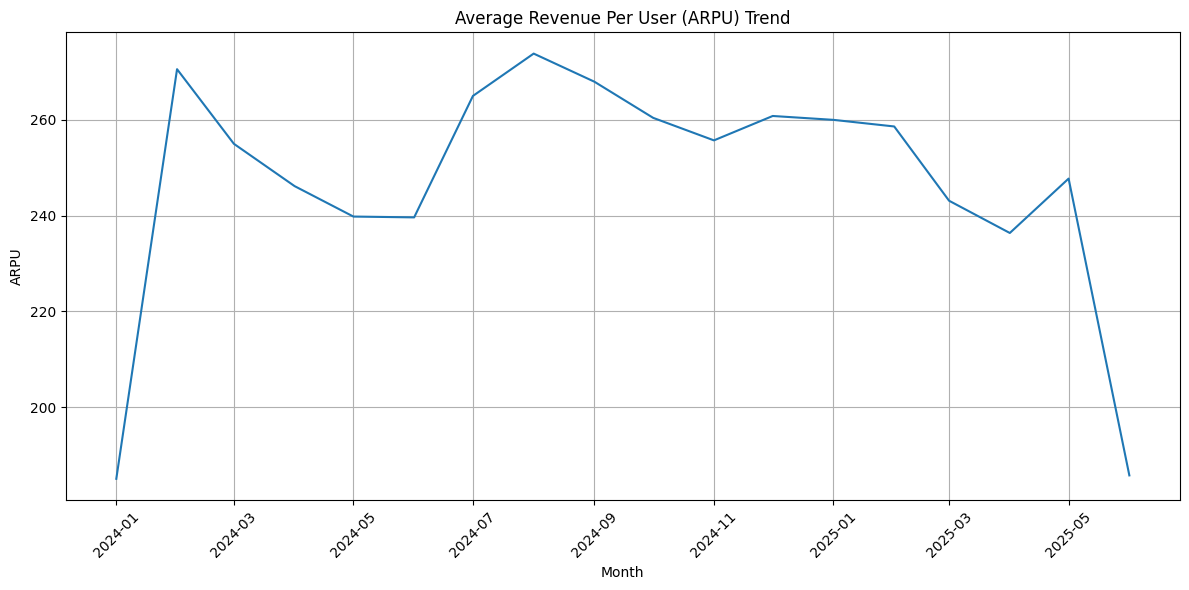

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=arpu_df, x='month', y='ARPU')
plt.title('Average Revenue Per User (ARPU) Trend')
plt.xlabel('Month')
plt.ylabel('ARPU')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Total Revenue by Plan Type

In [21]:
revenue_by_plan = merged_df.groupby('plan_type')['amount'].sum().reset_index()
revenue_by_plan.rename(columns={'amount': 'total_revenue'}, inplace=True)

print("Total revenue generated by each plan type:\n", revenue_by_plan)

Total revenue generated by each plan type:
     plan_type  total_revenue
0       Basic          16000
1  Enterprise         167000
2         Pro          66800


In [22]:
subscribers_by_plan = merged_df.groupby('plan_type')['customer_id'].nunique().reset_index()
subscribers_by_plan.rename(columns={'customer_id': 'num_subscribers'}, inplace=True)

print("Number of subscribers per plan type:\n", subscribers_by_plan)

Number of subscribers per plan type:
     plan_type  num_subscribers
0       Basic               58
1  Enterprise               57
2         Pro               53


In [23]:
churned_customers_by_plan = customers.dropna(subset=['churn_date']).groupby('plan_type')['customer_id'].nunique().reset_index()
churned_customers_by_plan.rename(columns={'customer_id': 'num_churned_customers'}, inplace=True)

print("Number of churned customers per plan type:\n", churned_customers_by_plan)

Number of churned customers per plan type:
     plan_type  num_churned_customers
0       Basic                     58
1  Enterprise                     57
2         Pro                     53


In [24]:
plan_performance = pd.merge(revenue_by_plan, subscribers_by_plan, on='plan_type', how='inner')
plan_performance = pd.merge(plan_performance, churned_customers_by_plan, on='plan_type', how='inner')

print("Combined plan performance metrics:\n", plan_performance)

Combined plan performance metrics:
     plan_type  total_revenue  num_subscribers  num_churned_customers
0       Basic          16000               58                     58
1  Enterprise         167000               57                     57
2         Pro          66800               53                     53


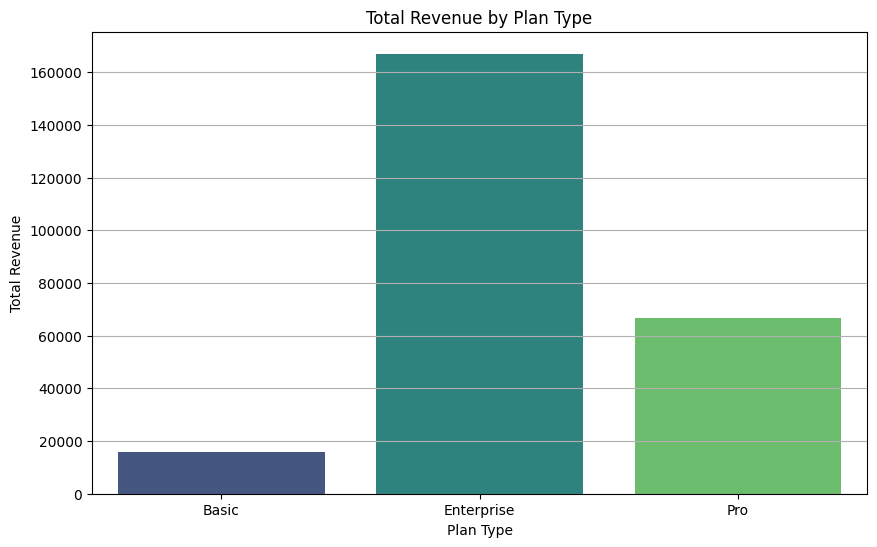

Bar plot showing Total Revenue by Plan Type displayed.


In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='plan_type', y='total_revenue', data=plan_performance, hue='plan_type', palette='viridis', legend=False)
plt.title('Total Revenue by Plan Type')
plt.xlabel('Plan Type')
plt.ylabel('Total Revenue')
plt.grid(axis='y')
plt.show()

print("Bar plot showing Total Revenue by Plan Type displayed.")

## Cohort Retention Heatmap

In [27]:
customers['signup_date'] = pd.to_datetime(customers['signup_date'])
customers['cohort_month'] = customers['signup_date'].dt.to_period('M').dt.to_timestamp()

print("Customers DataFrame after converting signup_date to datetime and creating cohort_month:")
print(customers.head())

Customers DataFrame after converting signup_date to datetime and creating cohort_month:
   customer_id signup_date plan_type  monthly_fee  acquisition_cost  \
0         1001  2024-11-07     Basic           50                30   
1         1002  2024-06-06     Basic           50                30   
2         1003  2024-12-31     Basic           50                30   
3         1004  2024-11-21       Pro          200               100   
4         1005  2024-08-16       Pro          200               100   

  churn_date cohort_month  
0        NaN   2024-11-01  
1        NaN   2024-06-01  
2        NaN   2024-12-01  
3        NaN   2024-11-01  
4        NaN   2024-08-01  


In [28]:
merged_df['signup_date'] = pd.to_datetime(merged_df['signup_date'])
merged_df['cohort_month'] = merged_df['signup_date'].dt.to_period('M').dt.to_timestamp()

print("Merged DataFrame after converting signup_date to datetime and creating cohort_month:")
print(merged_df.head())

Merged DataFrame after converting signup_date to datetime and creating cohort_month:
  subscription_id  customer_id      month  monthly_fee revenue_type  amount  \
0   S-1020-202410         1020 2024-10-01          200          MRR     200   
1   S-1020-202411         1020 2024-11-01          200          MRR     200   
2   S-1020-202412         1020 2024-12-01          200          MRR     200   
3   S-1020-202501         1020 2025-01-01          200          MRR     200   
4   S-1020-202502         1020 2025-02-01          200          MRR     200   

  signup_date plan_type  acquisition_cost  churn_date cohort_month  
0  2024-10-13       Pro               100  2025-05-08   2024-10-01  
1  2024-10-13       Pro               100  2025-05-08   2024-10-01  
2  2024-10-13       Pro               100  2025-05-08   2024-10-01  
3  2024-10-13       Pro               100  2025-05-08   2024-10-01  
4  2024-10-13       Pro               100  2025-05-08   2024-10-01  


In [39]:
merged_df['month_number'] = (merged_df['month'].dt.to_period('M') - merged_df['cohort_month'].dt.to_period('M')).apply(lambda x: x.n)

print("Merged DataFrame with 'month_number' calculated. Displaying the first 5 rows with relevant columns:")
print(merged_df[['customer_id', 'cohort_month', 'month', 'month_number']].head())

Merged DataFrame with 'month_number' calculated. Displaying the first 5 rows with relevant columns:
   customer_id cohort_month      month  month_number
0         1020   2024-10-01 2024-10-01             0
1         1020   2024-10-01 2024-11-01             1
2         1020   2024-10-01 2024-12-01             2
3         1020   2024-10-01 2025-01-01             3
4         1020   2024-10-01 2025-02-01             4


In [30]:
cohort_counts = merged_df.groupby(['cohort_month', 'month_number'])['customer_id'].nunique().reset_index()
cohort_counts.rename(columns={'customer_id': 'active_customers'}, inplace=True)

print("Cohort counts calculated. Displaying the first 5 rows:")
print(cohort_counts.head())

Cohort counts calculated. Displaying the first 5 rows:
  cohort_month  month_number  active_customers
0   2024-01-01             0                10
1   2024-01-01             1                 9
2   2024-01-01             2                 9
3   2024-01-01             3                 9
4   2024-01-01             4                 9


In [31]:
retention_matrix = cohort_counts.pivot_table(index='cohort_month', columns='month_number', values='active_customers')

print("Retention matrix created. Displaying the first 5 rows:")
print(retention_matrix.head())

Retention matrix created. Displaying the first 5 rows:
month_number    0     1     2     3    4    5    6    7    8    9    10   11  \
cohort_month                                                                   
2024-01-01    10.0   9.0   9.0   9.0  9.0  7.0  7.0  7.0  7.0  7.0  6.0  5.0   
2024-02-01     8.0   8.0   7.0   7.0  7.0  6.0  6.0  6.0  6.0  5.0  5.0  5.0   
2024-03-01    13.0  13.0  13.0  11.0  9.0  9.0  9.0  8.0  7.0  6.0  6.0  6.0   
2024-04-01    10.0  10.0   8.0   8.0  7.0  7.0  7.0  6.0  6.0  5.0  4.0  4.0   
2024-05-01    10.0  10.0  10.0   8.0  6.0  6.0  5.0  5.0  4.0  4.0  4.0  3.0   

month_number   12   13   14   15   16  
cohort_month                           
2024-01-01    4.0  3.0  2.0  1.0  1.0  
2024-02-01    5.0  4.0  1.0  1.0  NaN  
2024-03-01    6.0  6.0  5.0  2.0  NaN  
2024-04-01    2.0  NaN  NaN  NaN  NaN  
2024-05-01    2.0  NaN  NaN  NaN  NaN  


In [32]:
cohort_sizes = retention_matrix.iloc[:,0]
retention_matrix_percentages = retention_matrix.divide(cohort_sizes, axis=0)

print("Retention matrix (percentages):\n", retention_matrix_percentages.head())

Retention matrix (percentages):
 month_number   0    1      2         3         4         5         6   \
cohort_month                                                            
2024-01-01    1.0  0.9  0.900  0.900000  0.900000  0.700000  0.700000   
2024-02-01    1.0  1.0  0.875  0.875000  0.875000  0.750000  0.750000   
2024-03-01    1.0  1.0  1.000  0.846154  0.692308  0.692308  0.692308   
2024-04-01    1.0  1.0  0.800  0.800000  0.700000  0.700000  0.700000   
2024-05-01    1.0  1.0  1.000  0.800000  0.600000  0.600000  0.500000   

month_number        7         8         9         10        11        12  \
cohort_month                                                               
2024-01-01    0.700000  0.700000  0.700000  0.600000  0.500000  0.400000   
2024-02-01    0.750000  0.750000  0.625000  0.625000  0.625000  0.625000   
2024-03-01    0.615385  0.538462  0.461538  0.461538  0.461538  0.461538   
2024-04-01    0.600000  0.600000  0.500000  0.400000  0.400000  0.200000   

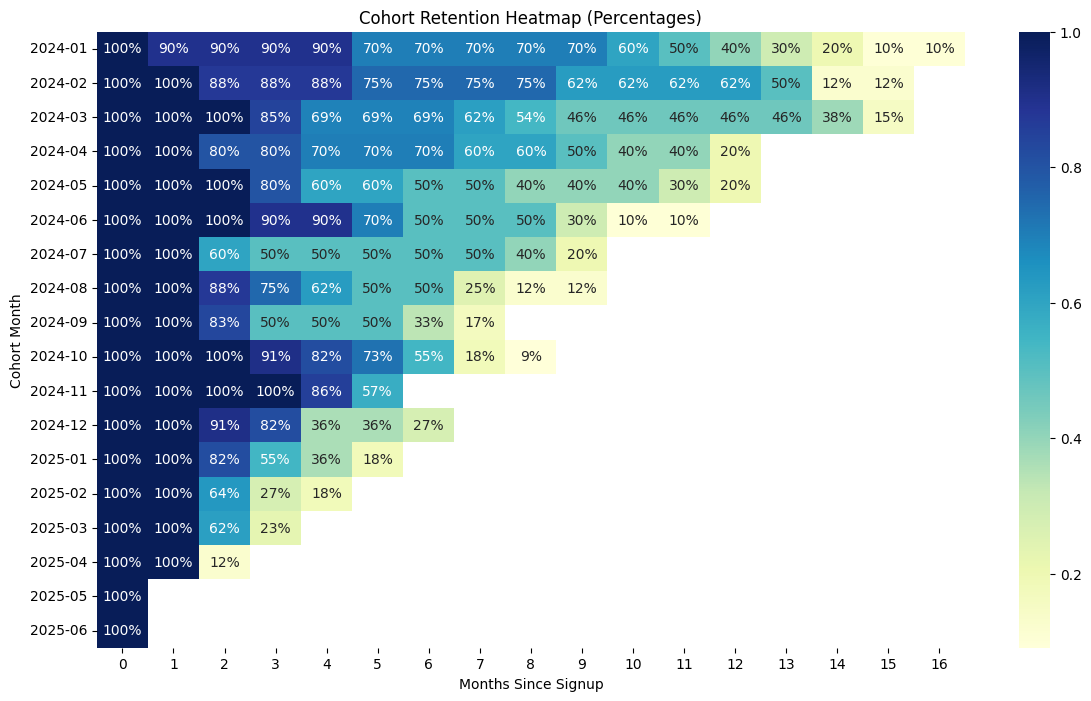

Cohort retention heatmap displayed.


In [38]:
retention_matrix_percentages.index = retention_matrix_percentages.index.strftime('%Y-%m')

plt.figure(figsize=(14, 8))
sns.heatmap(retention_matrix_percentages, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Retention Heatmap (Percentages)')
plt.xlabel('Months Since Signup')
plt.ylabel('Cohort Month')
plt.yticks(rotation=0)
plt.show()

## Average Customer Lifetime Value (LTV) by Plan Type

In [34]:
customers['churn_date'] = pd.to_datetime(customers['churn_date'], errors='coerce')
customers['lifespan_duration'] = customers['churn_date'] - customers['signup_date']
customers['customer_lifespan_months'] = (customers['lifespan_duration'] / pd.to_timedelta(30.437, unit='D')).apply(lambda x: np.floor(x) if pd.notna(x) else np.nan)

print("Customers DataFrame with 'lifespan_duration' and 'customer_lifespan_months' calculated:")
print(customers[['customer_id', 'signup_date', 'churn_date', 'lifespan_duration', 'customer_lifespan_months']].head())

Customers DataFrame with 'lifespan_duration' and 'customer_lifespan_months' calculated:
   customer_id signup_date churn_date lifespan_duration  \
0         1001  2024-11-07        NaT               NaT   
1         1002  2024-06-06        NaT               NaT   
2         1003  2024-12-31        NaT               NaT   
3         1004  2024-11-21        NaT               NaT   
4         1005  2024-08-16        NaT               NaT   

   customer_lifespan_months  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  


In [35]:
customers['churn_date'] = pd.to_datetime(customers['churn_date'], errors='coerce')
customers['lifespan_duration'] = customers['churn_date'] - customers['signup_date']
customers['customer_lifespan_months'] = (customers['lifespan_duration'] / pd.to_timedelta(30.437, unit='D')).apply(lambda x: np.floor(x) if pd.notna(x) else np.nan)

print("Customers DataFrame with 'lifespan_duration' and 'customer_lifespan_months' calculated:")
print(customers[['customer_id', 'signup_date', 'churn_date', 'lifespan_duration', 'customer_lifespan_months']].head())

Customers DataFrame with 'lifespan_duration' and 'customer_lifespan_months' calculated:
   customer_id signup_date churn_date lifespan_duration  \
0         1001  2024-11-07        NaT               NaT   
1         1002  2024-06-06        NaT               NaT   
2         1003  2024-12-31        NaT               NaT   
3         1004  2024-11-21        NaT               NaT   
4         1005  2024-08-16        NaT               NaT   

   customer_lifespan_months  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  


In [36]:
customers_with_lifespan = customers.dropna(subset=['customer_lifespan_months']).copy()
customers_with_lifespan['LTV'] = customers_with_lifespan['monthly_fee'] * customers_with_lifespan['customer_lifespan_months']

ltv_by_plan = customers_with_lifespan.groupby('plan_type')['LTV'].mean().reset_index()
ltv_by_plan.rename(columns={'LTV': 'average_LTV'}, inplace=True)

print("Average Customer Lifetime Value (LTV) by Plan Type:")
print(ltv_by_plan.head())

Average Customer Lifetime Value (LTV) by Plan Type:
    plan_type  average_LTV
0       Basic   225.000000
1  Enterprise  2412.280702
2         Pro  1049.056604


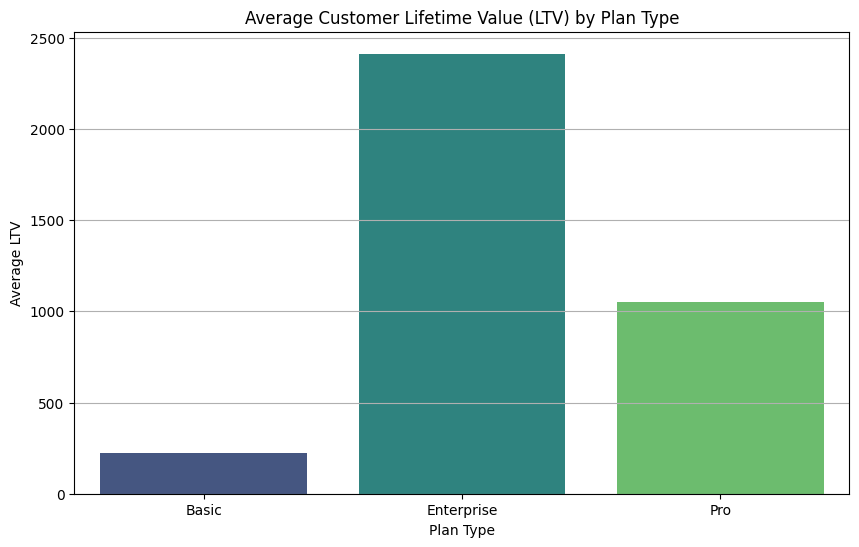

Bar plot showing Average Customer Lifetime Value (LTV) by Plan Type displayed.


In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='plan_type', y='average_LTV', data=ltv_by_plan, hue='plan_type', palette='viridis', legend=False)
plt.title('Average Customer Lifetime Value (LTV) by Plan Type')
plt.xlabel('Plan Type')
plt.ylabel('Average LTV')
plt.grid(axis='y')
plt.show()

print("Bar plot showing Average Customer Lifetime Value (LTV) by Plan Type displayed.")

# Data Quality Assessment

The data is quite **complete**, with no missing values, and it is also very **consistent** across the tables. The `customer_id` values **match correctly** between the `revenue` and `subscriptions` tables.

However, I noticed something unusual in both the Monthly Recurring Revenue (MRR)and the monthly customer churn metrics.

For the **MRR**, it starts low, rises quickly, and stays fairly stable for several months. But toward the end of the year, it begins to **drop sharply**. As for **customer churn**, the early months look normal with a low churn rate, but by the final month it **suddenly spikes dramatically**, to the point where **everyone churns**.

**Possible Causes:**

The sharp rise and fall in MRR may indicate simulated business cycles within the dataset, where customer activity is intentionally modeled to reflect periods of growth followed by decline. The sudden spike in churn at the end could also be the **result of artificially generated patterns** meant to help analysts practice detecting extreme churn scenarios rather than representing realistic customer behavior.

**Interpretation:**

These patterns suggest the dataset is **designed more for analytical training than for real-world forecasting**. While the data is structurally consistent, the extreme shifts should be treated as simulation artifacts rather than genuine market signals.